exp1 线性回归

In [1]:
import torch
from IPython import display
from matplotlib import pyplot as plt
import torch.nn as nn
import numpy as np
import random

In [2]:
num_inputs = 2#创建样本
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.tensor(np.random.normal(0, 1, (num_examples, num_inputs)), dtype=torch.float)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)
features, labels

(tensor([[-0.0431,  1.4613],
         [ 1.0362,  0.2710],
         [-1.7871,  1.0690],
         ...,
         [-0.1953,  1.3675],
         [ 0.3864, -0.1992],
         [ 0.0070,  1.3257]]),
 tensor([-8.5973e-01,  5.3490e+00, -3.0092e+00,  2.2716e+00,  8.2430e-01,
          4.1511e+00,  8.8855e+00,  7.6813e+00,  1.2679e+01,  1.6882e+00,
          3.5755e+00,  4.8035e+00,  4.2592e+00,  3.8837e+00,  3.5569e+00,
         -9.5606e-01,  4.7513e+00, -2.6772e+00, -6.9458e-01,  3.9157e+00,
          2.6570e+00, -1.3751e+00,  6.3067e+00,  3.3305e+00,  5.9524e+00,
          3.9006e+00,  1.1930e+01,  1.2595e+01,  3.7489e+00, -7.3024e-03,
          6.0973e+00,  5.7691e-01,  2.7290e+00,  9.3330e+00,  2.2457e+00,
         -2.7943e+00,  5.7391e+00,  5.0845e+00,  5.4020e+00,  3.2170e+00,
         -1.2589e+00,  5.0991e+00,  2.4928e+00,  3.2357e+00,  3.6676e+00,
         -4.3710e-01, -1.3944e+00,  3.0781e-01, -1.1634e+00,  5.4639e+00,
         -3.3014e+00,  5.7928e+00,  4.1746e+00,  5.5499e+00,  5.5588e+

C:\Users\qings\AppData\Local\Temp\ipykernel_21324\2499933371.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


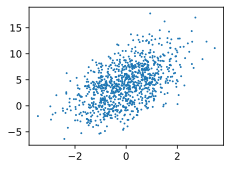

In [3]:
def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize
set_figsize()
plt.scatter(features[:, 0].numpy(), labels.numpy(), 1);

手动线性回归

In [4]:
num_inputs = 2
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices) # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # 最后一次可能不足一个batch
        yield features.index_select(0, j), labels.index_select(0, j)

In [5]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)
w, b

(tensor([[ 0.0023],
         [-0.0119]]),
 tensor([0.]))

In [6]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

In [7]:
def linreg(X, w, b):
    return torch.mm(X, w) + b

In [8]:
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

In [9]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size # 注意这里更改param时用的param.data

In [10]:
lr = 0.03
num_epochs = 100
net = linreg
loss = squared_loss
batch_size = 64
for epoch in range(num_epochs): # 训练模型一共需要num_epochs个迭代周期
    # 在每一个迭代周期中，会使用训练数据集中所有样本一次
    for X, y in data_iter(batch_size, features, labels): # x和y分别是小批量样本的特征和标签
        l = loss(net(X, w, b), y).sum() # l是有关小批量X和y的损失
        l.backward() # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size) # 使用小批量随机梯度下降迭代模型参数
        w.grad.data.zero_() # 梯度清零
        b.grad.data.zero_()
        train_l = loss(net(features, w, b), labels)
        print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 15.020499
epoch 1, loss 14.091981
epoch 1, loss 13.150383
epoch 1, loss 12.438778
epoch 1, loss 11.792371
epoch 1, loss 11.277027
epoch 1, loss 10.658298
epoch 1, loss 10.106228
epoch 1, loss 9.565527
epoch 1, loss 8.952183
epoch 1, loss 8.487294
epoch 1, loss 7.954167
epoch 1, loss 7.420892
epoch 1, loss 6.994187
epoch 1, loss 6.562964
epoch 1, loss 6.370199
epoch 2, loss 5.982418
epoch 2, loss 5.694291
epoch 2, loss 5.404747
epoch 2, loss 5.083739
epoch 2, loss 4.805662
epoch 2, loss 4.550708
epoch 2, loss 4.282316
epoch 2, loss 3.997514
epoch 2, loss 3.789977
epoch 2, loss 3.554842
epoch 2, loss 3.344349
epoch 2, loss 3.132904
epoch 2, loss 2.960036
epoch 2, loss 2.841682
epoch 2, loss 2.652546
epoch 2, loss 2.561720
epoch 3, loss 2.397246
epoch 3, loss 2.295061
epoch 3, loss 2.169235
epoch 3, loss 2.034279
epoch 3, loss 1.915057
epoch 3, loss 1.779666
epoch 3, loss 1.695040
epoch 3, loss 1.616067
epoch 3, loss 1.526837
epoch 3, loss 1.458100
epoch 3, loss 1.360991
epo

In [11]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 2.0005],
        [-3.4000]], requires_grad=True)
4.2 
 tensor([4.2002], requires_grad=True)


#######pytorch实现#########

In [12]:
lr = 0.03
import torch.utils.data as Data
batch_size = 10
# 将训练数据的特征和标签组合
dataset = Data.TensorDataset(features, labels)
# 把 dataset 放入 DataLoader
data_iter = Data.DataLoader(
    dataset=dataset, # torch TensorDataset format
    batch_size=batch_size, # mini batch size
    shuffle=True, # 是否打乱数据 (训练集一般需要进行打乱)
    num_workers=2, # 多线程来读数据，注意在Windows下需要设置为0
)

In [13]:
class LinearNet(nn.Module):
    def __init__(self, n_feature):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(n_feature, 1)
        self.activate = nn.Sigmoid()
        # 初始化权重和偏置
        nn.init.normal_(self.linear.weight, mean=0, std=0.01)
        nn.init.constant_(self.linear.bias, val=0)

    # forward 定义前向传播
    def forward(self, x):
        y = self.linear(x)
        y = self.activate(y)
        return y
net =LinearNet(num_inputs)

In [14]:
loss = nn.MSELoss()
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.03) #梯度下降的学习率指定为0.03
# 可以为不同的子网络设置不同学习率
optimizer = optim.SGD(net.parameters(), lr=0.03)

In [15]:
num_epochs = 50
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        output = net(X)
        l = loss(output, y.view(-1, 1))
        optimizer.zero_grad() # 梯度清零，等价于net.zero_grad()
        l.backward()
        optimizer.step()
        print('epoch %d, loss: %f' % (epoch, l.item()))

epoch 1, loss: 30.249475
epoch 1, loss: 14.140764
epoch 1, loss: 41.157616
epoch 1, loss: 40.060661
epoch 1, loss: 32.318287
epoch 1, loss: 20.369238
epoch 1, loss: 34.970947
epoch 1, loss: 23.569906
epoch 1, loss: 22.599916
epoch 1, loss: 38.431450
epoch 1, loss: 28.470953
epoch 1, loss: 13.537710
epoch 1, loss: 38.074959
epoch 1, loss: 44.638817
epoch 1, loss: 17.639179
epoch 1, loss: 11.804294
epoch 1, loss: 36.087406
epoch 1, loss: 25.226765
epoch 1, loss: 19.849468
epoch 1, loss: 27.286352
epoch 1, loss: 38.066818
epoch 1, loss: 26.523230
epoch 1, loss: 10.354604
epoch 1, loss: 28.578318
epoch 1, loss: 35.674702
epoch 1, loss: 12.199903
epoch 1, loss: 28.895355
epoch 1, loss: 14.984869
epoch 1, loss: 26.373119
epoch 1, loss: 22.577005
epoch 1, loss: 24.980087
epoch 1, loss: 23.705910
epoch 1, loss: 24.535696
epoch 1, loss: 23.372223
epoch 1, loss: 14.737623
epoch 1, loss: 31.243673
epoch 1, loss: 21.463430
epoch 1, loss: 34.351334
epoch 1, loss: 49.426647
epoch 1, loss: 12.236074
